**Name: Kwok Tsz Yi     Student ID: p233340**

**Import Python libraries**

In [84]:
import pandas as pd
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

**Load dataset**

In [85]:
df = pd.read_csv('TelcoCustomerChurn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Data transformation**

In [86]:
# Transform 'TotalCharges' to numeric value
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Data cleaning**

In [87]:
# Drop 'customerID' because it is not predictive
df.drop(['customerID'], axis = 1, inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [88]:
# Check missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [89]:
# Remove records with 'tenure' = 0 
df.drop(df[df['tenure'] == 0].index, inplace = True)

In [90]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Data encoding**

In [91]:
# Label encoding for binary categorical data
cat_cols = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df[cat_cols] = df[cat_cols].astype('category')

for columns in cat_cols:
    df[columns] = df[columns].cat.codes

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [92]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


**Exploratory Data Analysis**

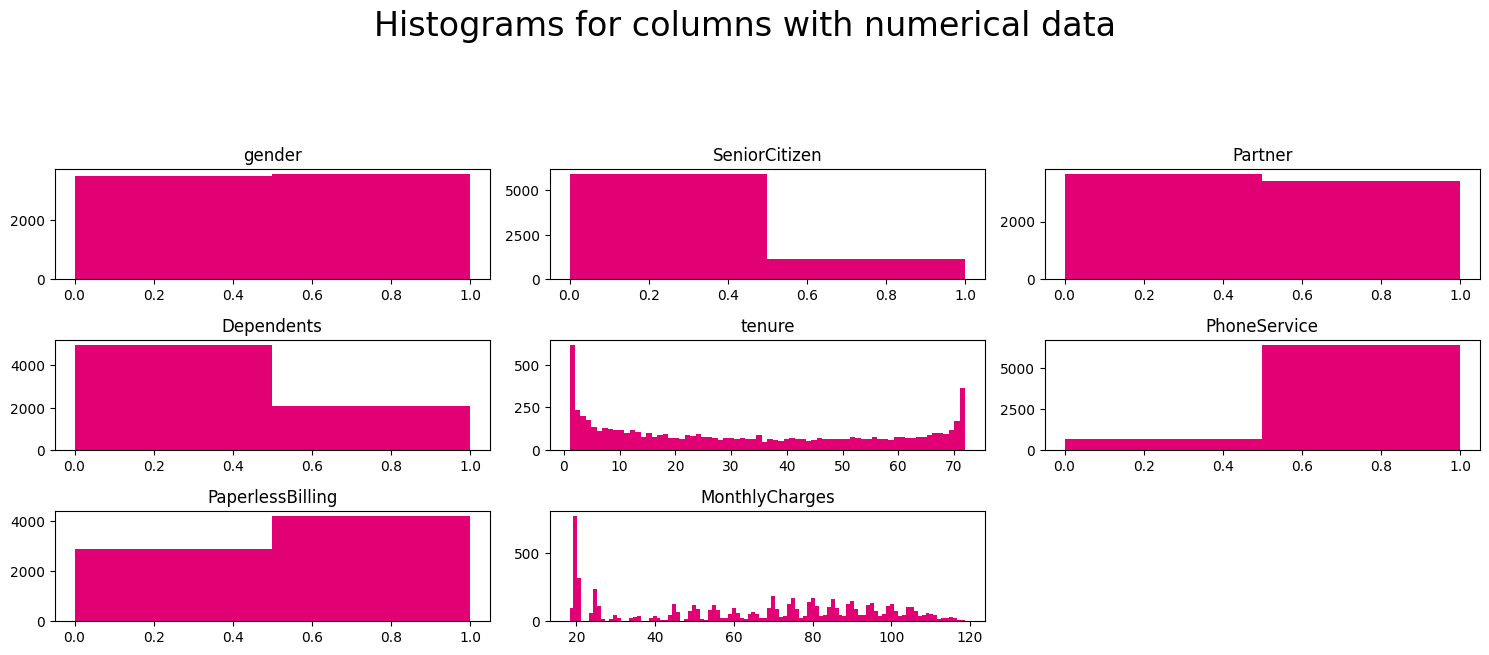

In [93]:
# HISTOGRAMS FOR COLUMNS WITH NUMERICAL DATA

ds_histograms = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges']]   

fig1 = plt.figure(1, figsize=(15, 12))
plt.suptitle('Histograms for columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    vals = np.size(ds_histograms.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(ds_histograms.iloc[:, i], bins=vals, color = '#e20075')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

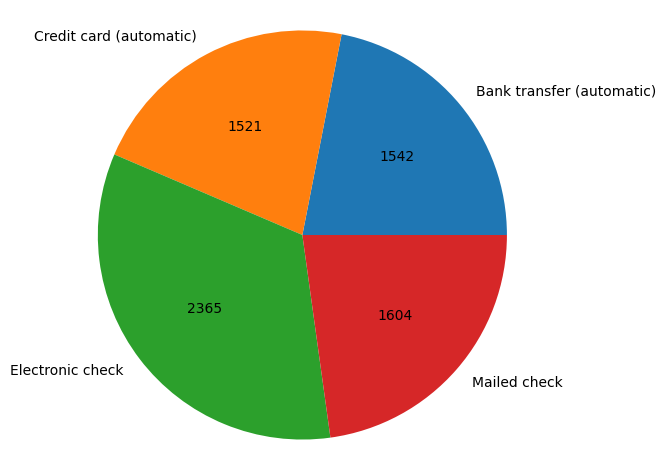

In [94]:
# ANALYZE PAYMENT METHOD
countPaymentMethod = df.groupby('PaymentMethod')['PaymentMethod'].count()

# show absolute values in 'PaymentMethod' groups
total = int(np.sum(df['PaymentMethod'].count()))

mylabels = ["Bank transfer (automatic)", "Credit card (automatic)", "Electronic check", "Mailed check"]

fig2, ax2 = plt.subplots()

# show absolute values in 'PaymentMethod' groups
ax2.pie(countPaymentMethod, labels=mylabels, autopct=lambda p: '{:.0f}'.format(p * total / 100))

# we will set an equal aspect ratio to place pie in a circle
ax2.axis('equal')
plt.tight_layout()
plt.show()

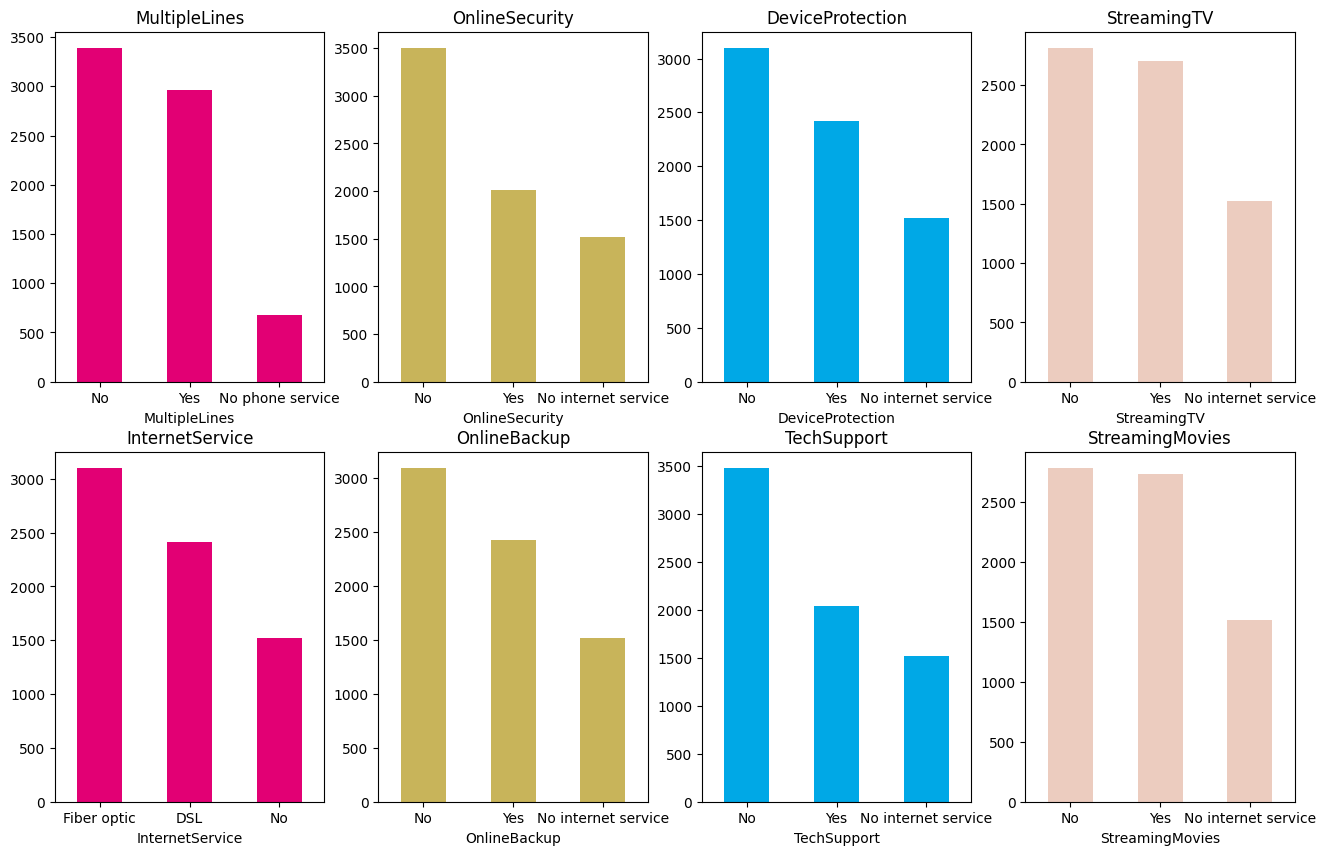

In [95]:
# SUBPLOTS FOR SERVICE DATA

service_labels = ['MultipleLines', 'InternetService','OnlineSecurity',
                'OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies']

# bar charts
fig3, axes = plt.subplots(nrows = 2, ncols = 4,figsize = (16,10))
for i, item in enumerate(service_labels):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i,0], rot = 0, color ='#e20074')
        ax.set_title(item)
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-2,1], rot = 0,color ='#c8b45a')
        ax.set_title(item)
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-4,2],rot = 0,color = '#00a8e6')
        ax.set_title(item)
    elif i < 8:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-6,3],rot = 0,color = '#ecccbf')
        ax.set_title(item)

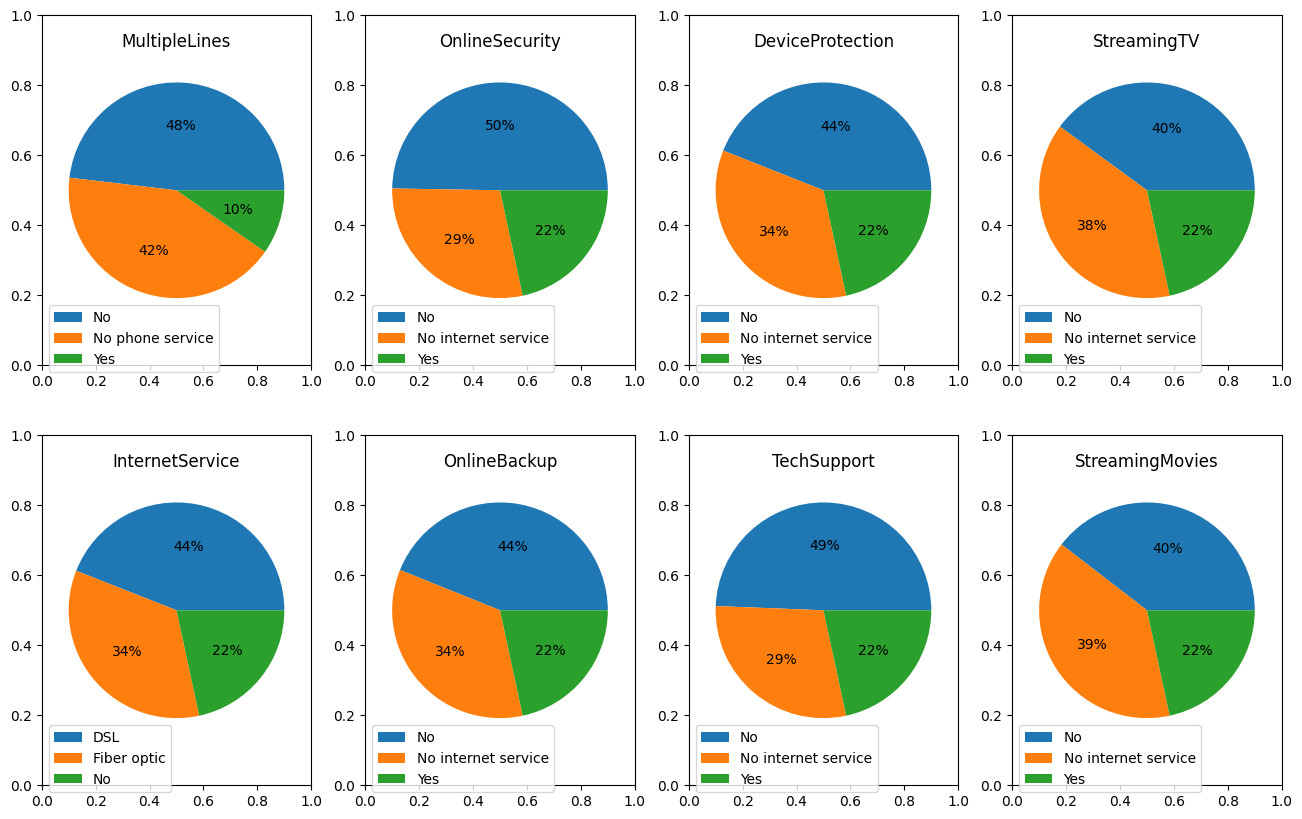

In [96]:
# pie charts
fig4, axes2 = plt.subplots(nrows = 2, ncols = 4,figsize = (16,10))

for i, item in enumerate(service_labels):
    if i < 2:
        ax1 = plt.subplot2grid((2,4), (i,0))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)
    elif i >=2 and i < 4:
        ax1 = plt.subplot2grid((2,4), (i-2,1))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)
    elif i >=4 and i < 6:
        ax1 = plt.subplot2grid((2,4), (i-4,2))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)
    elif i < 8:
        ax1 = plt.subplot2grid((2,4), (i-6,3))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)

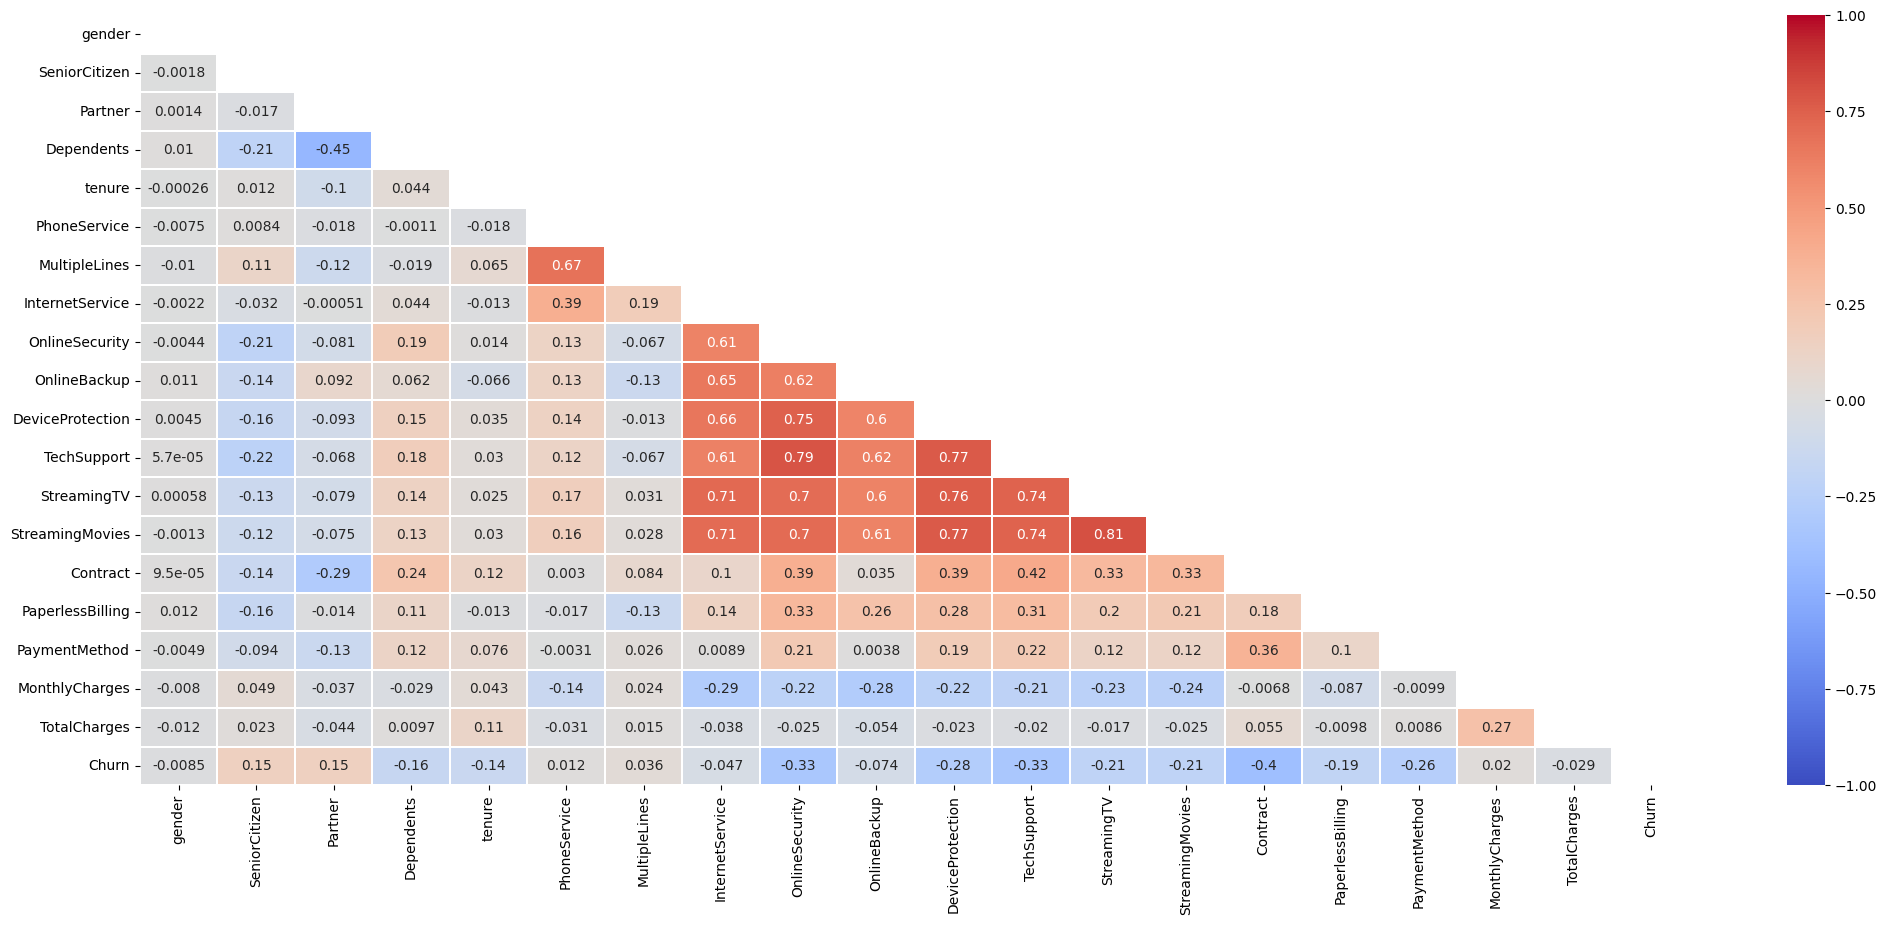

In [97]:
# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

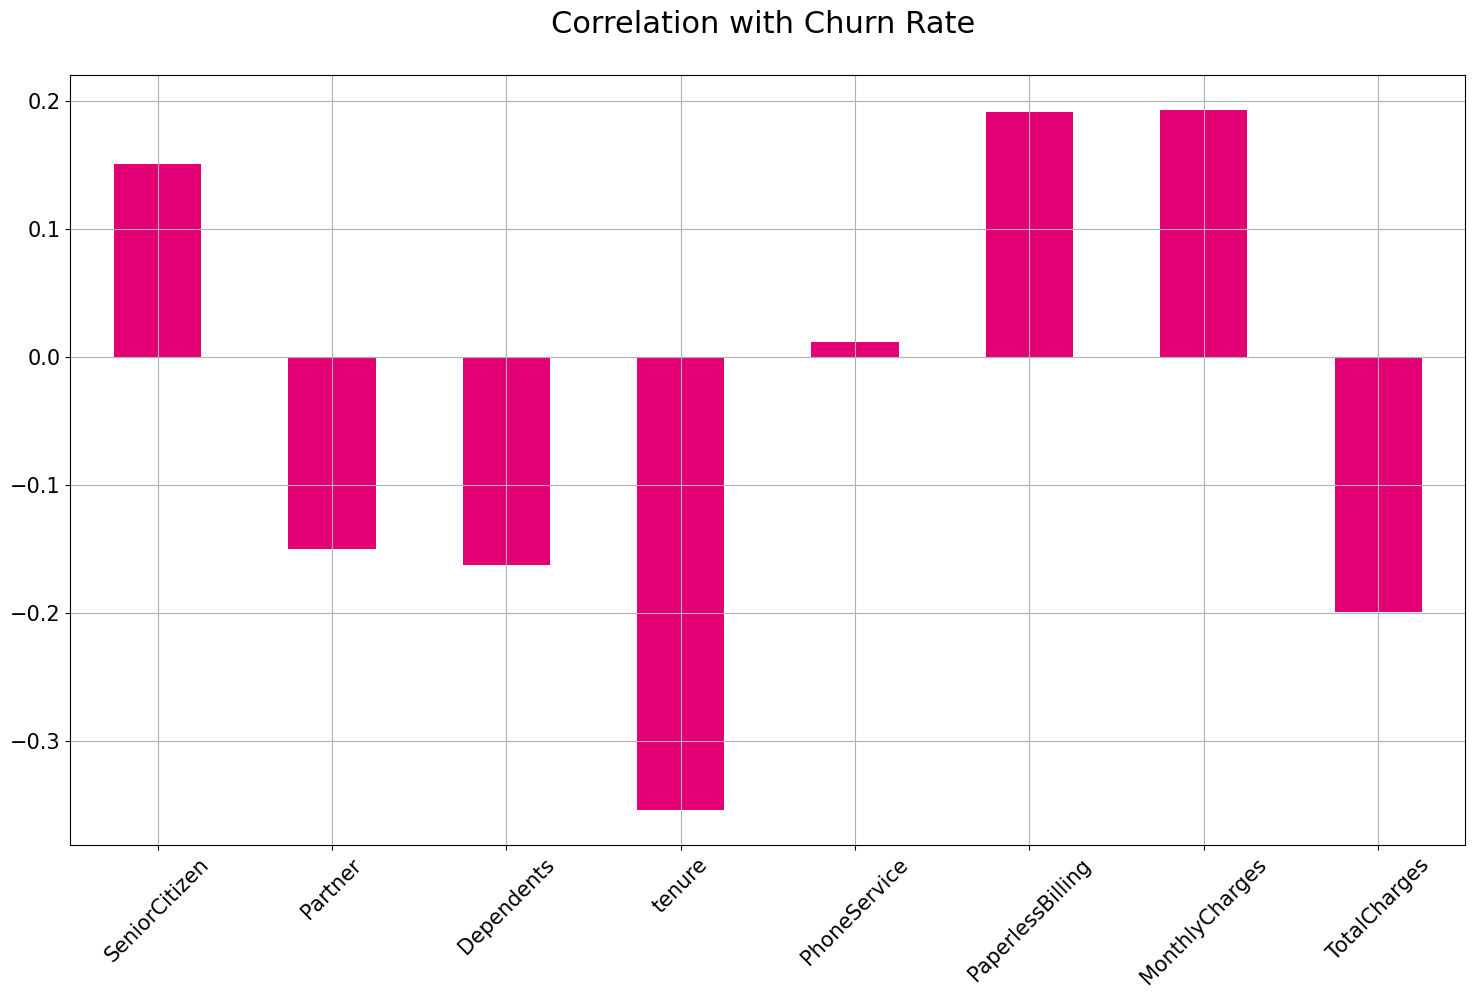

In [98]:
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)
ds_corr = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = ds_corr.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [99]:
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       int8
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                  int8
dtype: object

In [100]:
# One hot encoding for other categorical data
df = pd.get_dummies(df)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,False,False,True,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,True,False,False,True,False,False,False,False,False,True


Text(0.5, 1.0, 'Correlation: Contract type vs. Churn \n')

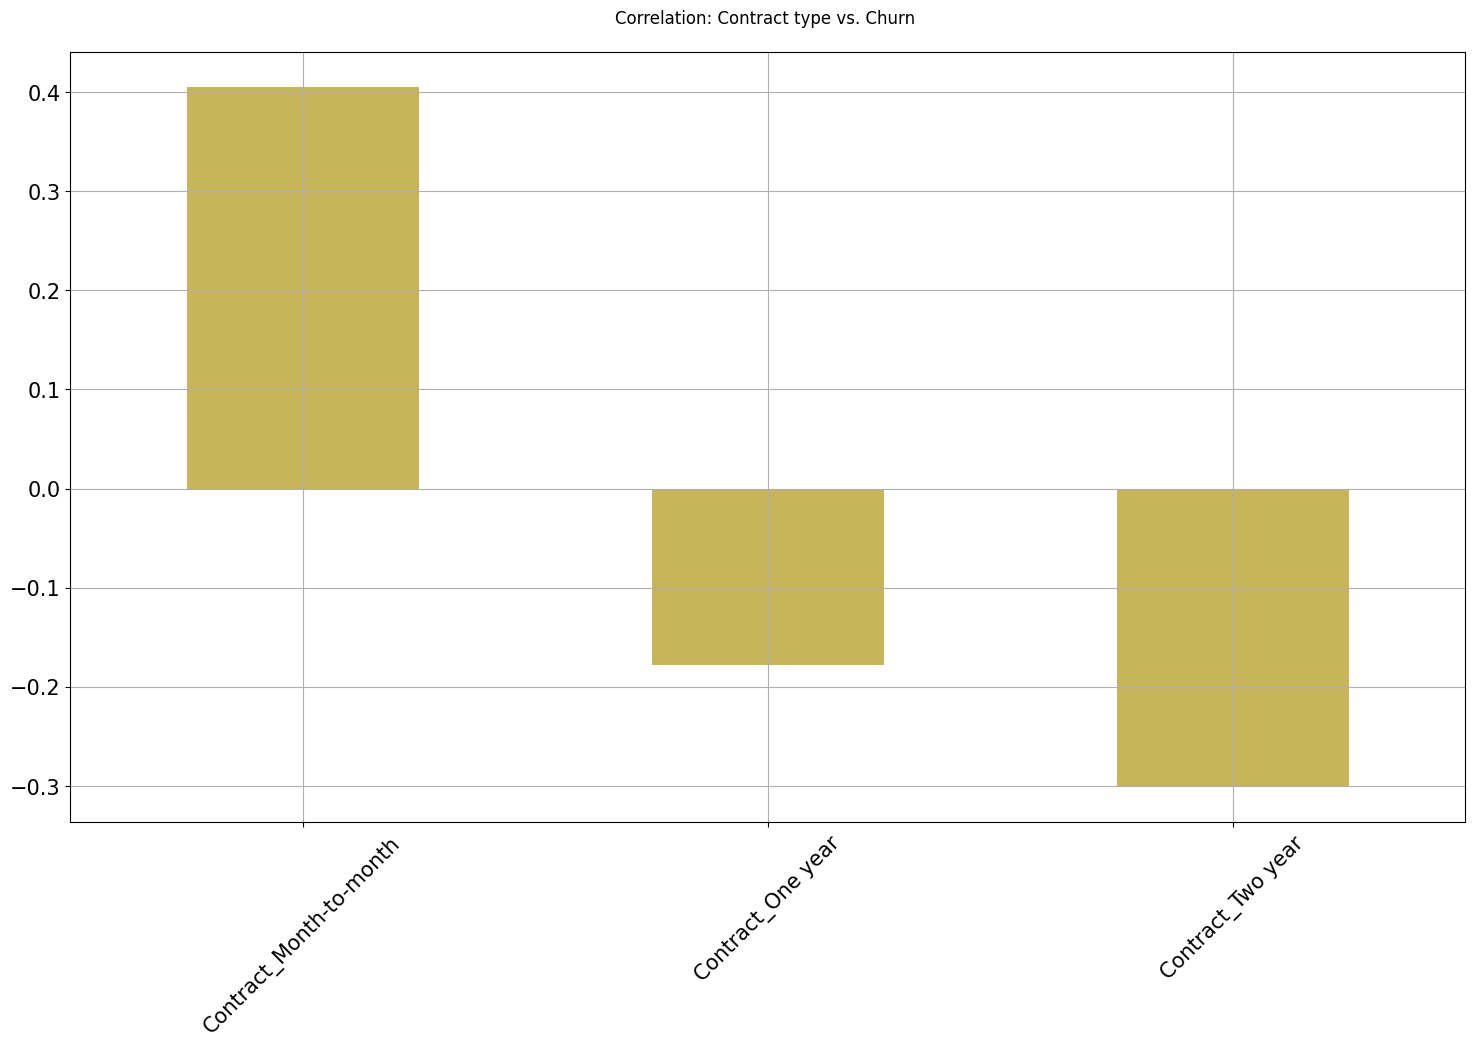

In [101]:
# Correlation: Contract type vs. Churn
plt.figure(7)

ds_contract_type_corr = \
    df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']]

correlations_1 = ds_contract_type_corr.corrwith(df.Churn)
correlations_1 = correlations_1[correlations_1!=1]
correlations_1.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#c8b45a',
        rot = 45, grid = True)

plt.title('Correlation: Contract type vs. Churn \n')

Text(0.5, 1.0, 'Correlation: Payment method vs. Churn \n')

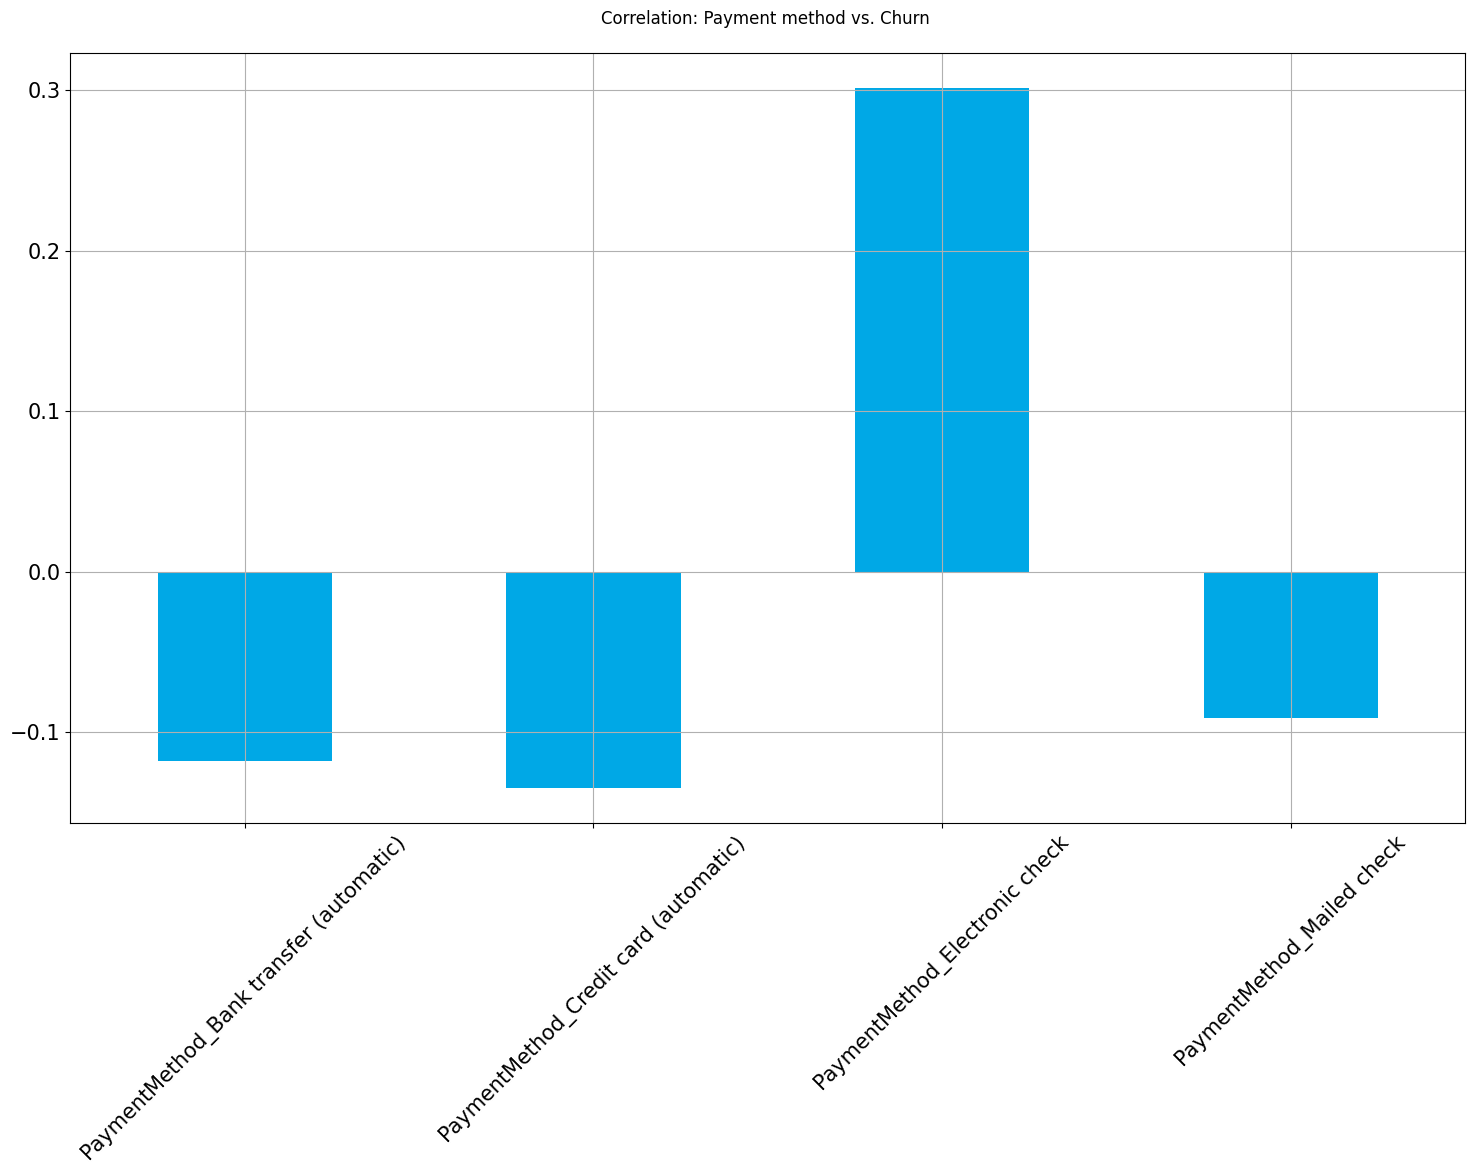

In [102]:
# Correlation: PaymentMethod vs. Churn
plt.figure(8)

ds_payment_method_corr = \
    df[['PaymentMethod_Bank transfer (automatic)', \
          'PaymentMethod_Credit card (automatic)', \
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

correlations_2= ds_payment_method_corr.corrwith(df.Churn)
correlations_2 = correlations_2[correlations_2!=1]

correlations_2.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#00a8e6',
        rot = 45, grid = True)

plt.title('Correlation: Payment method vs. Churn \n')

In [103]:
# Check multicollinearity

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

df_vif = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',\
                    'tenure', 'PhoneService', 'PaperlessBilling', \
                    'MonthlyCharges','TotalCharges']]

vif = calculate_vif(df_vif)
vif

,variables,Variable Inflation Factors
0,gender,1.922523
1,SeniorCitizen,1.327942
2,Partner,2.813694
3,Dependents,1.919266
4,tenure,10.727299
5,PhoneService,8.030292
6,PaperlessBilling,2.816921
7,MonthlyCharges,14.109313
8,TotalCharges,12.740486


Text(0.5, 1.0, 'Monthly Charges vs. Total Charges collinearity \n')

<Figure size 640x480 with 0 Axes>

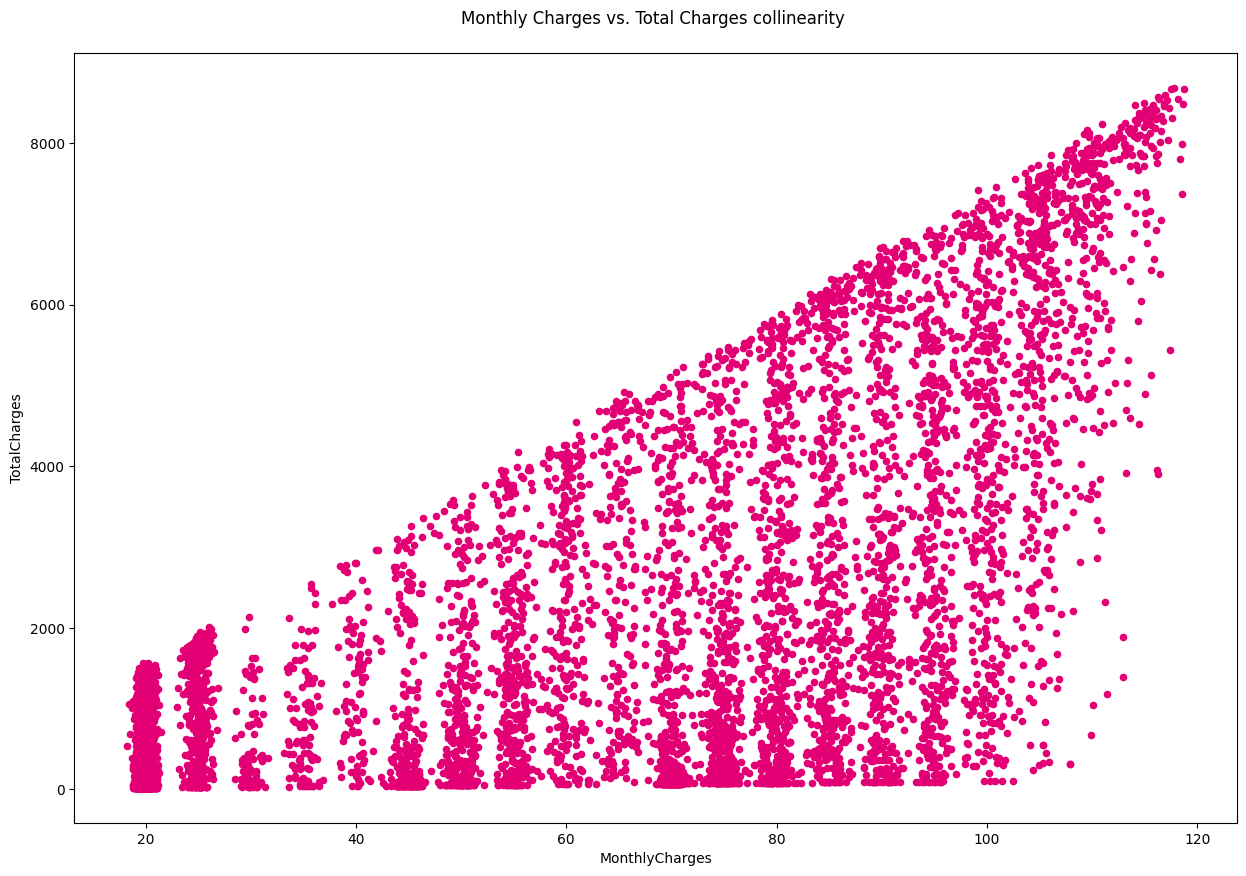

In [104]:
plt.figure(9)
df_vif[['MonthlyCharges', 'TotalCharges']]\
            .plot.scatter(figsize = (15, 10),
                  x ='MonthlyCharges',
                  y='TotalCharges',
                  color = '#e20074')

plt.title('Monthly Charges vs. Total Charges collinearity \n')

In [105]:
# we will drop 'TotalCharges' from VIF test dataset
df_vif2 = df_vif.drop(columns = "TotalCharges")

# check colinearity again
vif2 = calculate_vif(df_vif2)
vif2

,variables,Variable Inflation Factors
0,gender,1.878863
1,SeniorCitizen,1.323160
2,Partner,2.812757
3,Dependents,1.904657
4,tenure,3.299933
5,PhoneService,5.967552
6,PaperlessBilling,2.748477
7,MonthlyCharges,7.465415


In [106]:
# Drop the column "Total Charges"
df.drop(['TotalCharges'], axis = 1, inplace = True)
df.dtypes

gender                                        int8
SeniorCitizen                                 int8
Partner                                       int8
Dependents                                    int8
tenure                                       int64
PhoneService                                  int8
PaperlessBilling                              int8
MonthlyCharges                             float64
Churn                                         int8
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes                            bool
OnlineBackup_No                               bool
OnlineBackup_No internet servic

**Data splitting**

In [107]:
# Split the dataset into training and testing datasets
X = df.drop(columns = ['Churn'])
y = df['Churn']


# "train_test_split" will split arrays or matrices into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42, stratify=y)

**Decision Tree**

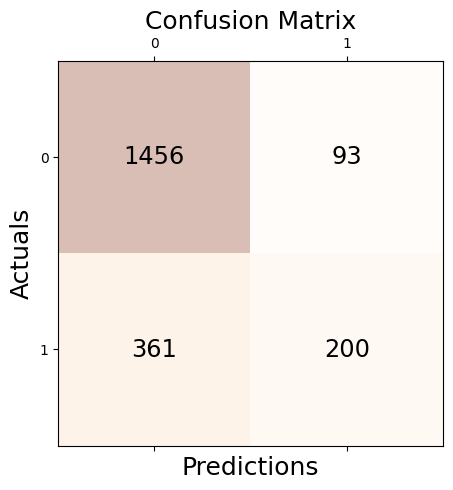

In [108]:
# decision tree to predict churn: class 0 means no churn, class 1 means churn
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train,y_train)

dtree_predict = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=dtree_predict)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [109]:
print('Precision: %.3f' % precision_score(y_test, dtree_predict))
print('Recall: %.3f' % recall_score(y_test, dtree_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, dtree_predict))
print('F1 Score: %.3f' % f1_score(y_test, dtree_predict))

Precision: 0.683
Recall: 0.357
Accuracy: 0.785
F1 Score: 0.468


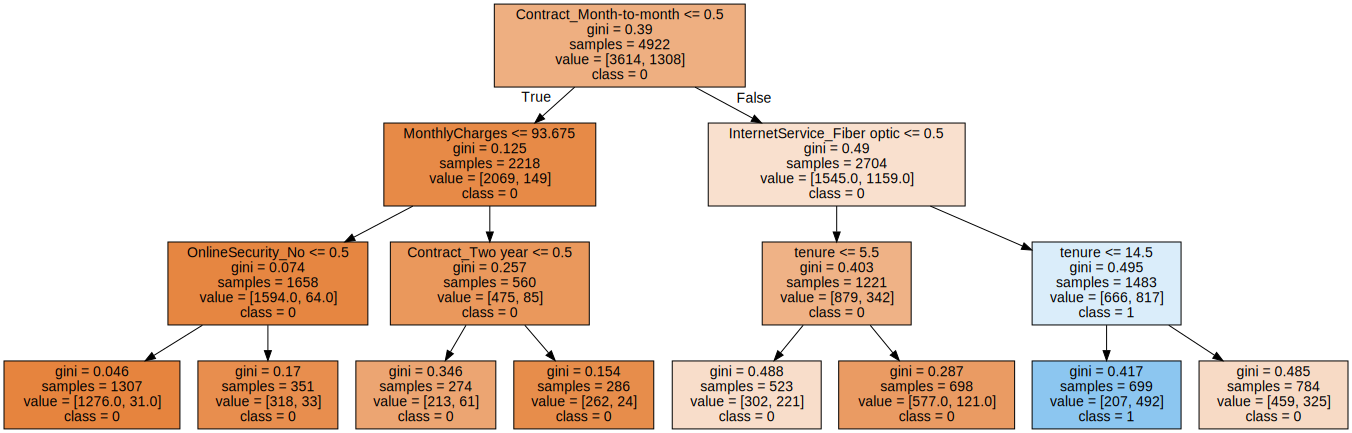

In [110]:
y_str_label = np.array(y.unique()).astype(str)
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y_str_label,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Assume that we begin with the maximum tree depth of 3**

**Question 1: How many leaf nodes does the tree have?**

In [111]:
# calculate the leaf node of dot_data
num_leaf = dot_data.count('value =')
print('Number of leaf nodes: ', num_leaf)

Number of leaf nodes:  15


Answer 1: Number of leaf nodes:  15

**Question 2: What is the prediction of the leftmost leaf node in the tree?**

Answer 2:
gini = 0.046
samples = 1307
value = [1276, 31]
class = 0

**Question 3: Which type(s) of customers are predicted to churn?**

Answer 3: Customer perficted to churn: contract_month_to_month <= 0.5 is False, InternetService_Fiber optic <= 0.5 is False, tenure <= 14.5 is True
(Tenure: The length of time a customer has been a customer of the business)

**Question 4: Please interpret the confusion matrix.**

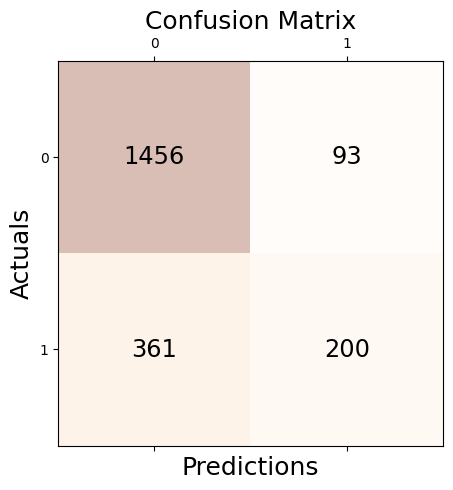

In [112]:
# decision tree to predict churn: class 0 means no churn, class 1 means churn
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train,y_train)

dtree_predict = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=dtree_predict)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Answer 4: The number of cases of prediction error from the decision tree is: 93 (predict 1 but actual 0) + 361 (predict 0 but actual 1) = 454

**Question 5: Please suggest one sales or marketing strategy for the customers who are predicted to churn in Question 3.**

Answer 5:
Customer perficted to churn: contract_month_to_month <= 0.5 is False, InternetService_Fiber optic <= 0.5 is False, tenure <= 14.5 is True
Customer who has a contract of month-to-month but not one or two years, use fiber optic and has a tenure less than 14.5 months are predicted to churn. The company can provide a discount to customers to encourage to sign a long-term contract to reduce the churn rate.

**Question 6: Answer Question 3 & 5 when the maximum depth of the tree is 4.**

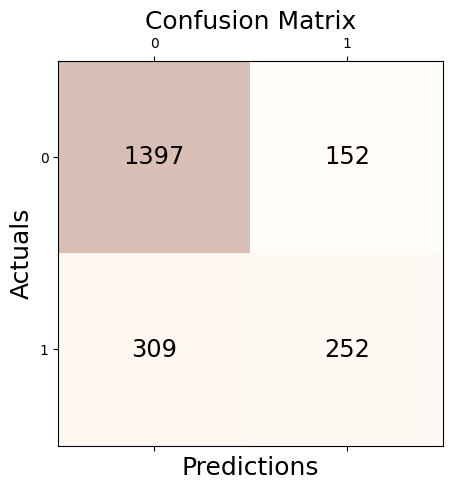

In [122]:
# decision tree to predict churn: class 0 means no churn, class 1 means churn
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train,y_train)

dtree_predict = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=dtree_predict)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [124]:
print('Precision: %.3f' % precision_score(y_test, dtree_predict))
print('Recall: %.3f' % recall_score(y_test, dtree_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, dtree_predict))
print('F1 Score: %.3f' % f1_score(y_test, dtree_predict))

'''
Precision: 0.683
Recall: 0.357
Accuracy: 0.785
F1 Score: 0.468
'''

Precision: 0.624
Recall: 0.449
Accuracy: 0.782
F1 Score: 0.522


'\nPrecision: 0.683\nRecall: 0.357\nAccuracy: 0.785\nF1 Score: 0.468\n'

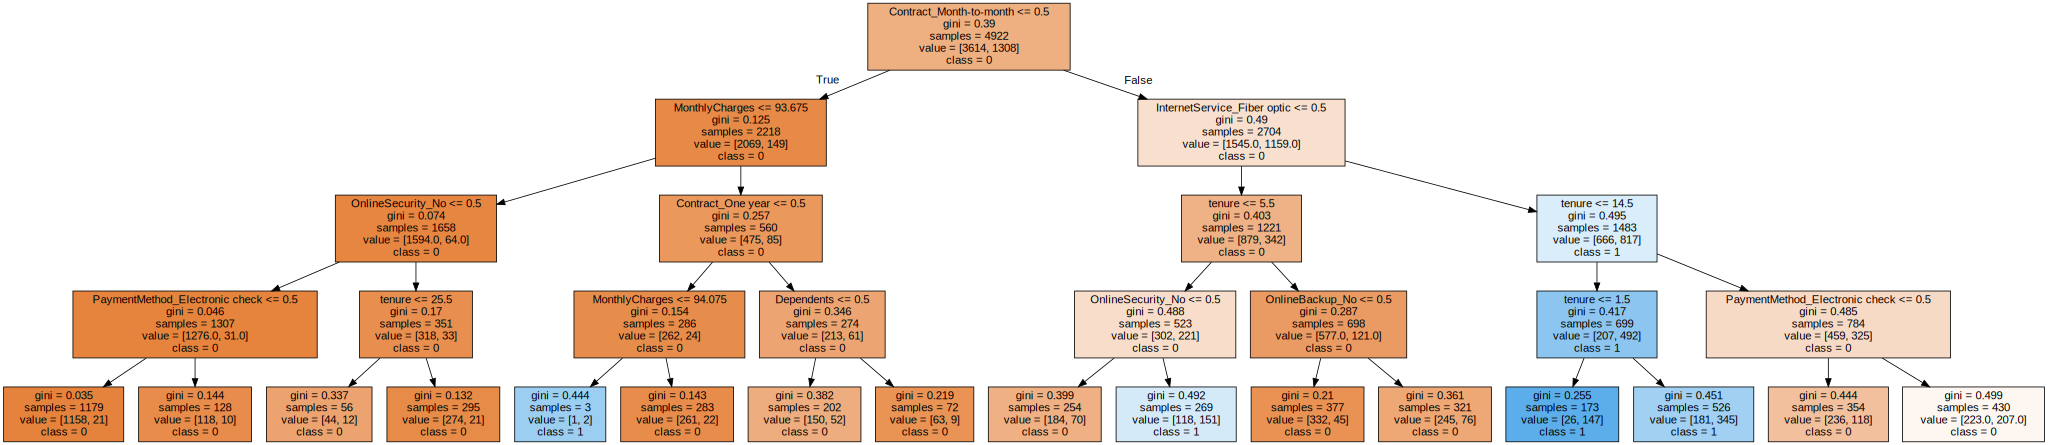

In [115]:
y_str_label = np.array(y.unique()).astype(str)
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y_str_label,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Quetsion 6:
Customer perficted to churn: 
- Contract_Month-to-month <= 0.5 is False, InternetService_Fiber optic <= 0.5 is False, tenure <= 14.5 is True
- Contract_Month-to-month <= 0.5 is False, InternetService_Fiber optic <= 0.5 is True, tenure <= 5.5 is True, OnlineSecurity_No <= 0.5 is False
- Contract_Month-to-month <= 0.5 is True, MonthlyCharges <= 93.675 is True, Contract_One year <= 0.5 is True, MonthlyCharges <= 94.075 is True

Marketing strategy:
Customer who has a month-to-month contract, does not use the fiber optic internet but having tenure less than 14.5; or customer who uses the fiber optic internet, has tenure less than 5.5 months and use online security; or customer who don't have a month-to-month contract, has monthly charges less than 93.675 and does not have a one-year contract (which implys that's a two year contract) and monthly charges less than 94.075 are predicted to churn. 

Hence, the most important strategy is to encourage customers changing contract from month-to-month to one or two years. The company can provide a discount to customers to encourage to sign a long-term contract to reduce the churn rate.

For the case of 2 years contract with monthly charges less than 93.675, as the calue is too low (only 1 case), this can be assumed as abnormal case, hence the company no need to adjust its marketing strategy for this case.